# Bonus Question from the SQL Challenge. M. Wright 

### Python SQL toolkit and Object Relational Mapper


In [1]:
#Importing all of the Dependancies

from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import pw 


In [2]:
#For the bargraphs using matplotlib inline 
%matplotlib inline

In [3]:
#Accessing the Database
from sqlalchemy import create_engine
engine = create_engine("postgresql://postgres:" + pw + "@localhost:5432/Employee_DB")
connection = engine.connect()

#### Query for the employees in the database


In [4]:
#Quering the database and seeing it in a dataframe.
#Read SQL query into a DataFrame. Returns a DataFrame corresponding to the result set of the query string.
#https://changhsinlee.com/pyderpuffgirls-ep2/
#https://stackoverflow.com/questions/27770729/how-to-read-sql-query-to-pandas-dataframe-python-django

employees = pd.read_sql("select * from employees", connection)
employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### Query for the salaries in the database


In [5]:
#Quering the database and seeing the salaries as a dataframe 
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


### Query for the titles in the database


In [6]:
#Quering the database and seeing the titles as a dataframe 
titles = pd.read_sql("SELECT * FROM titles", connection)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [7]:
#Use pd.merge to combine the salaries and titles. Remember to say how to join. 

merged_db = pd.merge(salaries, titles, on="emp_no", how="inner", suffixes=('_salary', '_title'))
merged_db

,emp_no,salary,from_date_salary,to_date_salary,title,from_date_title,to_date_title
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27


In [8]:
#Clean it up and sort by job titles because we need to make a bar graph for the salaries by job titles. 
grp_title_salary = merged_db.groupby('title').mean()
grp_title_salary

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [9]:
# To prepare the dataframe, remove the employee number since we will not be using that. 
title_salary_df = grp_title_salary.drop(columns = "emp_no")
title_salary_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [10]:
#Create a salaries dataframe to prepare the data to make a histogram for the salaries. 

title_salary_df = title_salary_df.reset_index()
title_salary_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


### View the Range of Salaries in a histogram to inspect the data. 

(array([4., 0., 0., 1., 0., 0., 0., 0., 0., 2.]),
 array([48493.20478583, 49494.21296868, 50495.22115153, 51496.22933438,
        52497.23751723, 53498.24570008, 54499.25388293, 55500.26206578,
        56501.27024863, 57502.27843148, 58503.28661433]),
 <a list of 10 Patch objects>)

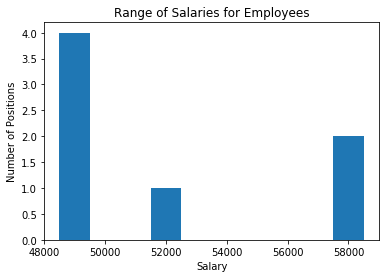

In [11]:
salaries = title_salary_df["salary"]

plt.ylabel('Number of Positions')
plt.xlabel('Salary')
plt.title('Range of Salaries for Employees')
plt.hist([salaries])


##### It seems a little unusual that the salaries are not evenly distributed. 

### Bar Chart to view salaries by job title. 

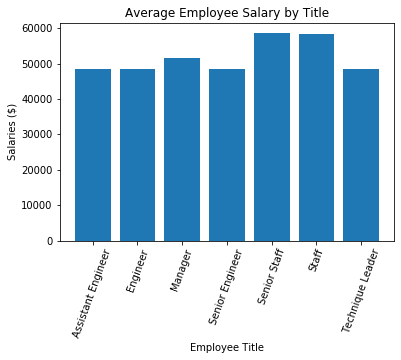

In [12]:
x_axis = title_salary_df["title"]
ticks = np.arange(len(x_axis))
y_axis = title_salary_df["salary"]
 
plt.bar(x_axis, y_axis, align="center")

plt.xticks(ticks, x_axis, rotation="70")

plt.ylabel("Salaries ($)")
plt.xlabel("Employee Title")
plt.title("Average Employee Salary by Title")

plt.show()

#### It seems unusual that the Senior Staff doesn't make more than the staff and that the senior engineer doesn't make more than the engineers. 

In [13]:
#According to the epilogue, we need to search fcr ourselves.
employees_findme = employees[(employees.emp_no == 499942)]

employees_findme

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10


In [14]:
# Haha we are April Fools Day. Data is clearly fake. 